In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings

warnings.simplefilter(action='ignore')
%matplotlib inline

# Descripción
<a id="desc"></a>
Este script se centra en los Juegos Olímpicos modernos y de como han ido evolucionando. Se ha obtenido un dataset que incluye información sobre todos los atletas que han participado en todas las ediciones desde 1896. Con estos datos se ha querido extraer conocimineto a mediante la tranformación de estos y su representación gráfica. Además, se ha querido realizar un conocimineto mas específico sobre el Atletismo, por lo que ha obtenido otro dataset que contiene los resultados obtenidos por los atlestas en todas las pruebas de dicho deporte.   

# Tabla de contenidos
1. [Leer datos](#leer)
2. [Preprocesamiento](#pre)
3. [Analsis general de los JJOO](#general)<br>
    3.1. [Deportes por año](#dep_year)<br>
    3.2. [Comparación de numero de deportistas hombre y deportistas mujeres a lo largo de los años](#women)<br>
    3.3. [Países con más atletas con medallas](#top50)<br>
    
4. [España: Análisis de la actuación de los atletas españoles en los JJOO](#esp)<br>
    4.1. [Top 10 de los olimpicos españoles con mas medallas](#top10)<br>
    4.2. [Analisis del equipo olímpico español de baloncesto](#basket)<br>
    4.3. [Deportes con mas medallas](#sport_medals)<br>
5. [Atletismo: Análisis de los resultados obtenidos a lo largo de los JJOO](#ath)<br>
    5.1. [Resultados obtenidos en 100m](#100m)<br>
    5.2. [Comparativa entre atletas de distintas pruebas](#mth)<br>
    5.3. [Regresión para predecir valores futuros](#reg)<br>
    5.4. [Machine Learning](#ml)<br>


# Leer datos
<a id="leer"></a>
Los datos han sido descargados e incluídos en la carpeta *res*.

Fuentes:
- Datos de los juegos olímpicos: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/download
- Datos de atletismo: https://www.kaggle.com/jayrav13/olympic-track-field-results/download

In [2]:
athlete_event = pd.read_csv('res'+os.sep+'athlete_events.csv')
noc =  pd.read_csv('res'+os.sep+'noc_regions.csv')
athletics_df = pd.read_csv('res'+os.sep+'results.csv', names = 
    ['Gender',
     'Event',
     'Location',
     'Year',
     'Medal',
     'Name',
     'Nationality',
     'Result',
     'Wind'])


In [3]:
noc.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


Conjunto de deportistas que han participado en los juegos olímpicos

In [4]:
athlete_event.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Conjunto de deportistas que han participado en las pruebas de athletismo junto con los resultados obtenidos

In [5]:
athletics_df.head(10)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Wind
0,Gender,Event,Location,Year,Medal,Name,Nationality,Result,NaN
1,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17,NaN
2,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64,NaN
3,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26,NaN
4,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17,NaN
5,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77,NaN
6,M,10000M Men,Beijing,2008,B,Micah KOGO,KEN,27:04.11,NaN
7,M,10000M Men,Sydney,2000,G,Haile GEBRSELASSIE,ETH,27:18.20,NaN
8,M,10000M Men,Sydney,2000,S,Paul TERGAT,KEN,27:18.29,NaN
9,M,10000M Men,Sydney,2000,B,Assefa MEZGEBU,ETH,27:19.75,NaN


# Preprocesamiento
<a id="pre"></a>


### Dataset de atletas

Se requiere hacer una serie de labroes en el preporocesamineto de los datos de este dataframe:
   - Quedarnos solo con los Juegos Olimpicos de verano
   - Eliminar las columnas *Season* y *Games*
   - Replazar con 0 en la columna *Medal* cuando encuentre un NaN
 

In [6]:
athlete_event = athlete_event[athlete_event['Season'] == 'Summer']

In [7]:
athlete_event.drop('Season', axis=1, inplace=True)
athlete_event.drop('Games', axis=1, inplace=True)

In [8]:
athlete_event['Medal'].fillna(0, inplace= True)

In [9]:
athlete_event.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,0
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,0
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000,Sydney,Badminton,Badminton Men's Singles,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996,Atlanta,Sailing,Sailing Women's Windsurfer,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000,Sydney,Sailing,Sailing Women's Windsurfer,0


### Dataset de atletismo

Las siguientes operaciones de preprocesamiento son necesarias:
   - Replazar con 0 los valores NaN en la columna *Wind*
   - Eliminar la primera fila(los nombres de la columna vienen repetidos)
   - Cambiar nombre a las columnas *Nationality*
   - Cambiar en la columna *Medal* los valores (G -> Gold, S -> Silver, B -> Bronze ) 
   - Cambiar por NaN aquellos valores de *Result* es los que pone *None* y eliminar esas filas
   - Cambiar el tipo de la columna *Year* a 'int64'

In [10]:
athletics_df["Wind"].fillna(0, inplace=True)
athletics_df.drop(0, axis=0, inplace=True)
athletics_df.rename(columns={'Nationality':'NOC'}, inplace=True)
athletics_df['Medal']  = athletics_df['Medal'].apply(lambda x : 'Gold' if x == 'G' else ('Silver' if x == 'S' else 'Bronze'))
athletics_df['Result']  = athletics_df['Result'].apply(lambda x : np.nan if x == 'None' else x)
athletics_df.dropna(inplace= True)
athletics_df.Year = athletics_df.Year.astype('int64') 

In [11]:
athletics_df.head()

,Gender,Event,Location,Year,Medal,Name,NOC,Result,Wind
1,M,10000M Men,Rio,2016,Gold,Mohamed FARAH,USA,25:05.17,0.0
2,M,10000M Men,Rio,2016,Silver,Paul Kipngetich TANUI,KEN,27:05.64,0.0
3,M,10000M Men,Rio,2016,Bronze,Tamirat TOLA,ETH,27:06.26,0.0
4,M,10000M Men,Beijing,2008,Gold,Kenenisa BEKELE,ETH,27:01.17,0.0
5,M,10000M Men,Beijing,2008,Silver,Sileshi SIHINE,ETH,27:02.77,0.0


# Analisis general de los JJOO
<a id="general"></a>


### Deportes por año
<a id="dep_year"></a>
Un aspecto interesante a analizar es ver como el numero de deporte ha ido variando a lo largo de los años, puesto que muchos han ido apreciendo y otros han ido desapareciendo

In [12]:
#numero de deportes por año
#en primer lugar obtenemos los deportes por año y los ordenamos segun el año
sports_df = athlete_event[['Year', 'Sport']].sort_values('Year') 
#eliminamos todos los datos duplicados (hay una entrada por cada deportista que participó en dicho deporte ese año)
sports_df = sports_df.drop_duplicates().groupby('Year').count()
sports_df.reset_index(inplace=True)

Obtenemos un dataframe en el que obtenemos el numero de deportes existentes en cada año.

In [13]:
sports_df.head()

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1906,13
4,1908,24


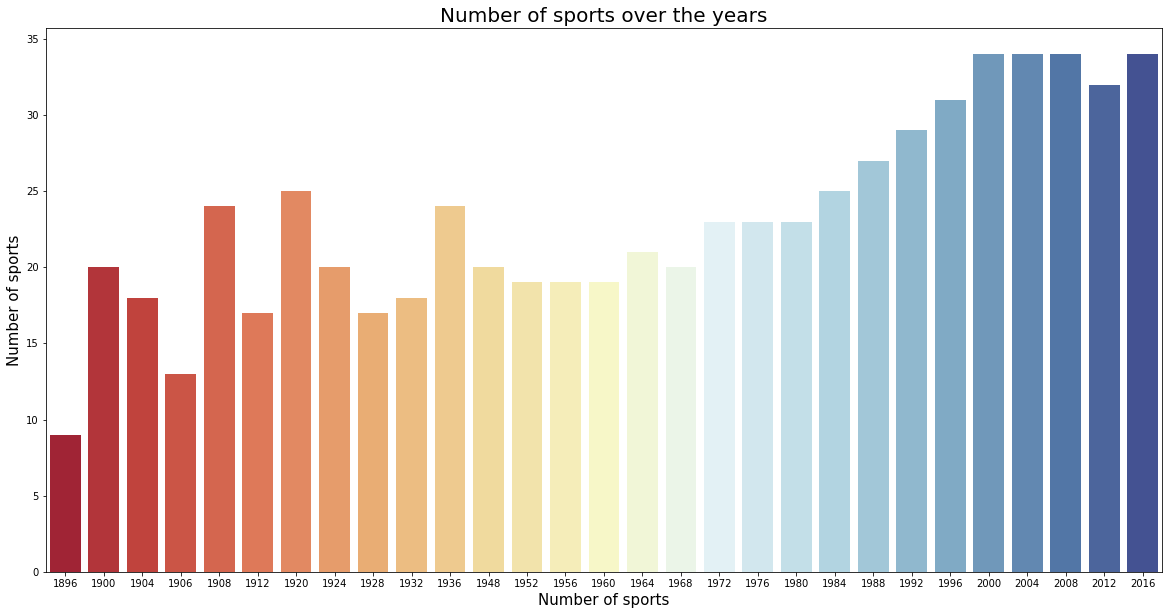

In [14]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Year", y="Sport",  data=sports_df, palette = 'RdYlBu')
ax.set_title('Number of sports over the years', fontsize=20)
ax.set_ylabel("Number of sports", fontsize=15)
ax.set_xlabel("Number of sports", fontsize=15)

plt.show()

Como podemos ver en el gráfico, en 1900 habia 20 deportes, mientras que en 2016 habia 34. Vamos a cpmprobar cuales de los deportes que existían en 1900 ya no existieron en 2016 y cuales de los que existieron en 2016 no existian en 1900.

In [15]:
sports_2016 = athlete_event[['Sport']].loc[athlete_event['Year'] == 2016].drop_duplicates()
sports_1900 = athlete_event[['Sport']].loc[athlete_event['Year'] == 1900].drop_duplicates()

- Deportes añadidos desde 1900 hasta 2016

In [16]:
list(set(sports_2016.Sport.values) - set(sports_1900.Sport.values))

['Boxing',
 'Rugby Sevens',
 'Modern Pentathlon',
 'Taekwondo',
 'Trampolining',
 'Weightlifting',
 'Rhythmic Gymnastics',
 'Badminton',
 'Basketball',
 'Triathlon',
 'Synchronized Swimming',
 'Judo',
 'Diving',
 'Wrestling',
 'Canoeing',
 'Volleyball',
 'Beach Volleyball',
 'Handball',
 'Hockey',
 'Table Tennis']

- Deportes existentes en 1900 que en 2016 ya no existían

In [17]:
list(set(sports_1900.Sport.values) - set(sports_2016.Sport.values))

['Polo', 'Basque Pelota', 'Rugby', 'Cricket', 'Tug-Of-War', 'Croquet']

### Comparación de numero de deportistas hombre y deportistas mujeres a lo largo de los años
<a id="women"></a>
 Desde la fecha que tenemos datos, el papel de la mujer en el mundo del deporte ha ido cogiendo cada vez más importancia. Un aspecto que me parecía interesante analizar es conocer el volumen de atletas mujeres en contraposición con el de atletas hombres.


In [18]:
# Obtenemos los deportistas, el sexo y el año en que participaron y eliminamos los repetidos 
# (un deportista puede haber participado en varios eventos el mismo año, por lo uqe saldrá dos veces)
athletes_sex = athlete_event[['Sex','Year', 'Name']].drop_duplicates() 

# Obtenemos un dataframe con el año y el sexo de cada deportista
athletes_sex = athletes_sex[['Sex', 'Year']] 

In [19]:
#obtenemos un dataframe que contendrá el año y el numero de atletas hombres ese año
male_athletes = athletes_sex[athletes_sex['Sex']=='M'].groupby('Year').count().rename(columns={"Sex":"Male"})

#obtenemos un dataframe que contendrá el año y el numero de atletas mujeres ese año
female_athletes = athletes_sex[athletes_sex['Sex']=='F'].groupby('Year').count().rename(columns={"Sex":"Female"})

#juntamos ambos dataframes
sex_analysis =  male_athletes.join(female_athletes, on='Year')

In [20]:
sex_analysis.head()

,Male,Female
Year,,
1896,176,NaN
1900,1197,23.0
1904,644,6.0
1906,835,6.0
1908,1980,44.0


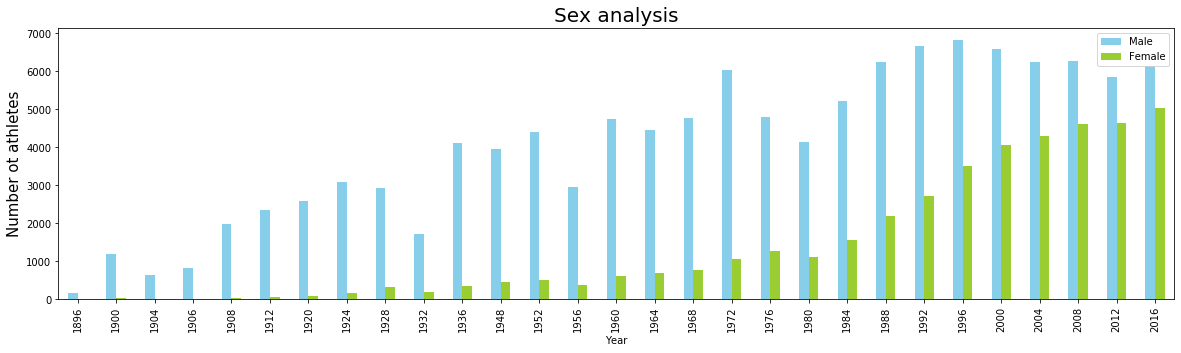

In [21]:
ax  = sex_analysis.plot(kind='bar',figsize=(20, 5), color = ['skyblue', 'yellowgreen'])
ax.set_title('Sex analysis', fontsize=20)
ax.set_ylabel('Number ot athletes',  fontsize=15)
plt.show()

Es interesante ver como hasta aproximadamente los años 50, prácticamente no había mujeres en las olimpiadas y como, desde los años 80, ha ido aumentando la participación de deportistas de sexo femenino, estando cada vez más cerca de igualar al numero de depertistas masculinos.

### Países con más atletas con medallas
<a id="top50"></a>
A continuación, se va a conocer cuales son los equipos olímpicos que han conseguido mayor numero de medallas olímpicas. Es improtante tener en cuenta aquí que algunos de estos países actualmente no existe y que, varios de los que existen actualmente, no estaban hace 50 años.

In [22]:
country_medals =athlete_event[['Team', 'Medal', 'NOC']].sort_values('NOC')
teams = pd.unique(country_medals.Team)
df_country = pd.DataFrame([], columns={'Gold', 'Silver', 'Bronze', 'Team'})
for team in teams:
    a = country_medals[(country_medals.Team == team)].set_index(["Team", "Medal"]).count(level="Medal").transpose()
    a['Team'] = team
    df_country = pd.concat([df_country,a], ignore_index =True)

In [23]:
df_country.fillna(0, inplace=True)  #sustituimos los valores nan por 0
df_country.drop(0, axis=1, inplace=True) 
df_country['Total'] = df_country.Gold + df_country.Silver + df_country.Bronze

In [24]:
df_country.head()

,Bronze,Gold,Silver,Team,Total
0,2,0,0,Afghanistan,2
1,0,0,1,Netherlands Antilles,1
2,0,0,0,Albania,0
3,8,5,4,Algeria,17
4,0,0,0,Andorra,0


In [25]:
df_country.sort_values('Total', ascending= False, inplace= True) #ordenamos de mayor a menor los paises en funcion de las medallas obtenidas
df_country = df_country.iloc[:50,] #nos quedamos con las 50 primeras filas


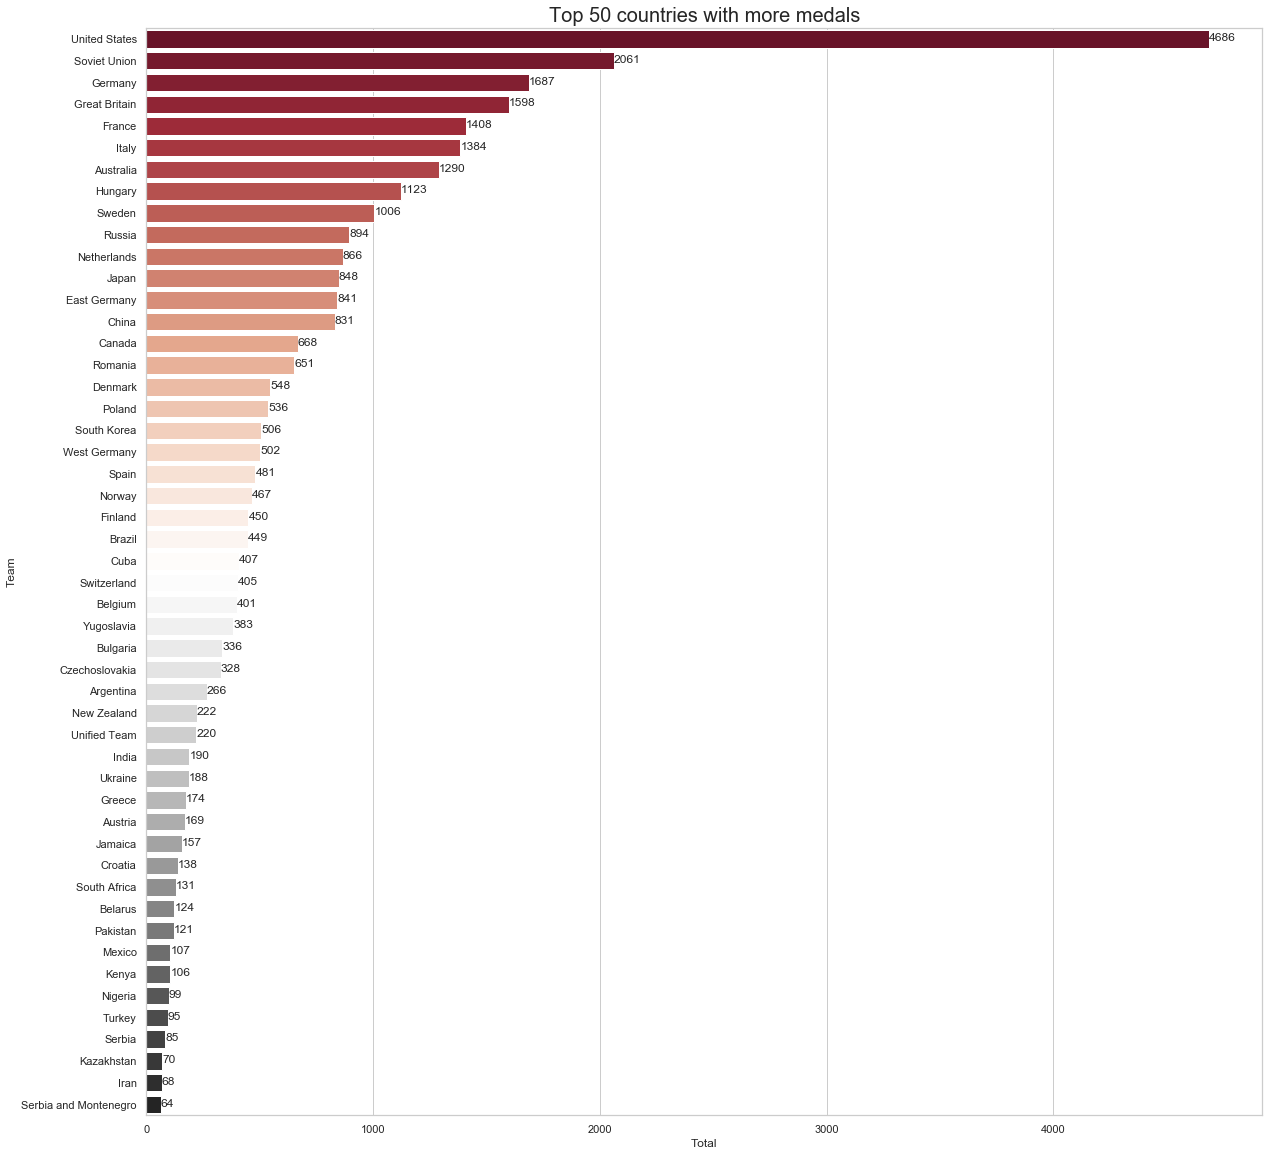

In [26]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

ax = sns.barplot(x="Total", y="Team", data=df_country, label="Total", palette = "RdGy")
space =0.9
for i, p in enumerate(ax.patches):
    _x = p.get_x() + p.get_width()  + float(space)
    _y = p.get_y() + p.get_height() - float(0.3)
    value = df_country['Total'].iloc[i]
    ax.text(_x, _y, value, ha="left") 
plt.title('Top 50 countries with more medals', fontsize=20)
plt.show()

# España: Análisis de la actuación de los atletas españoles en los JJOO
<a id="esp"></a>


### Top 10 de los olimpicos españoles con mas medallas
<a id="top10"></a>
En este apartado se va a obtener quienes son los deportistas que han obtenido mayor numero de medallas. Para ello, vamos a obtener las columnas *Name* y *Medal* y vamos a pivotarla, para generar 3 columnas: una para los oros, otra para las platas y otro para los bronces. A continuación, vamos a sumar las 3 columnas con el objetivo de conseguir el total de medallas conseguido por cada deportista

In [27]:
spanish_athletes = athlete_event[athlete_event['NOC'] == 'ESP']

In [28]:
spanish_athletes_meda = spanish_athletes[['Name','Medal']]
spanish_athletes_meda['count'] = spanish_athletes_meda['Medal'].apply(lambda x: 1 if x!= 0 else 0)

In [29]:
medallas = spanish_athletes_meda.pivot_table(index='Name',columns='Medal',  values='count', fill_value=0, aggfunc=np.sum).drop(0, axis=1)
medallas['Total'] = medallas['Gold'] + medallas['Silver'] + medallas['Bronze']

In [30]:
medallas.sort_values('Total', ascending=False).head(10)

Medal,Bronze,Gold,Silver,Total
Name,,,,
David Cal Figueroa,0,1,4,5
Sal Craviotto Rivero,1,2,1,4
Mireia Belmonte Garca,1,1,2,4
"Arnzazu Isabel Mara ""Arantxa"" Snchez Vicario",2,0,2,4
Andrea Fuentes Fache,1,0,3,4
Joan Llaneras Rossell,0,2,2,4
Juan Carlos Navarro Feijoo,1,0,2,3
Jos Manuel Caldern Borrallo,1,0,2,3
"Rodolfo ""Rudy"" Fernndez Farrs",1,0,2,3


Como podemos observar, el deportista David Cal Figeroa es el español con mas medallas en total. Vamos a obtener informacion ahora sobre este deportista:

In [31]:
spanish_athletes[spanish_athletes.Name== 'David Cal Figueroa']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
33660,17348,David Cal Figueroa,M,21.0,183.0,86.0,Spain,ESP,2004,Athina,Canoeing,"Canoeing Men's Canadian Singles, 500 metres",Silver
33661,17348,David Cal Figueroa,M,21.0,183.0,86.0,Spain,ESP,2004,Athina,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Gold
33662,17348,David Cal Figueroa,M,25.0,183.0,86.0,Spain,ESP,2008,Beijing,Canoeing,"Canoeing Men's Canadian Singles, 500 metres",Silver
33663,17348,David Cal Figueroa,M,25.0,183.0,86.0,Spain,ESP,2008,Beijing,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Silver
33664,17348,David Cal Figueroa,M,29.0,183.0,86.0,Spain,ESP,2012,London,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Silver


Como podemos comprobar, es un deportista de Piragüismo, que ha participado en los años 2004, 2008 y 2012 en los Juegos Olímpicos

### Analisis del equipo olímpico español de baloncesto
<a id="basket"></a>
El equipo español masculino de baloncesto ha participado en varias ocasiones en el JJOO, y en algunas de esas ocasiones se han obtenido buenos resultados. En este apartado se va a descubrir si el peso, la altura, la edad y el índice de masa corporaral de los jugadores ha influído en la consecución de las medallas olímpicas

- Funciones de utilidad

In [32]:
def get_BMI(row):
    '''
    Función que calcula el indice de masa corporal
    
    @param row
        Fila con los valores necesarios
    @return
        Indice de masa corporal para esos valores
    '''
    return row.Weight/((row.Height/100)**2)

def get_statistics_df(basket, years):
    '''
    Función que calcula el valor medio de la altura, peso y edad de un equipo cada año, asi como el BMI
    
    @param basket
        dataframe con la info de los jugadores
    @param years
        años a analizar
    
    @return 
        dataframe con los valores calculados
    '''
    statistics_df = pd.DataFrame([], columns={'Year', 'Age','Height' ,'Weight', 'BMI','Medal'})
    for year in years:
        mean  = basket[basket.Year == year].mean()
        mean['Year'] = year
        mean['Medal'] = pd.unique(basket[basket.Year == year].Medal)[0]
        statistics_df = statistics_df.append(mean, ignore_index=True)
    statistics_df['BMI'] = statistics_df.apply(get_BMI, axis=1)
    return statistics_df    

In [33]:
#obtenemos los deportistas que han participado en los juegos olímpicos cada año que son españoles, hombres y de baloncesto y nos quedamos con las columnas Age, Height, Weight, Medal y Year

spanish_basket = spanish_athletes[(spanish_athletes.Sport=='Basketball') & (spanish_athletes.Sex== 'M')]
spanish_basket.sort_values('Year', inplace=True)
spanish_basket = spanish_basket[['Age', 'Height', 'Weight', 'Medal', 'Year']]
spanish_basket.head()

,Age,Height,Weight,Medal,Year
172823,20.0,185.0,72.0,0,1960
63875,22.0,168.0,74.0,0,1960
81952,21.0,189.0,94.0,0,1960
86249,23.0,192.0,80.0,0,1960
20639,21.0,179.0,68.0,0,1960


In [34]:
#obtenemos los años en los que españa ha participado y obtenemos las estadísticas de cada año
years = pd.unique(spanish_basket.Year)
statistics_df = get_statistics_df(spanish_basket, years)
statistics_df.head()

,BMI,Height,Medal,Age,Year,Weight
0,22.822531,183.083333,0,21.666667,1960.0,76.500000
1,22.928458,187.083333,0,25.916667,1968.0,80.250000
2,22.198712,192.000000,0,24.083333,1972.0,81.833333
3,22.978620,196.250000,0,24.333333,1980.0,88.500000
4,23.437996,197.583333,Silver,25.416667,1984.0,91.500000


Va a ser interesante comparar las medias de los valores obtenidos para los equipos españoles con la media global de los jugadores ese año. 

In [35]:
global_basket = athlete_event[(athlete_event.Sport=='Basketball') & (athlete_event.Sex== 'M')].sort_values('Year')
global_basket = global_basket[['Age', 'Height', 'Weight', 'Medal', 'Year']]
global_statics_basket = get_statistics_df(global_basket, years)

Ploteamos la información obtenida dela siguiente manera:
   - Grafico comparatorio del peso medio español por año con el peso medio global
   - Grafico comparatorio de la altura media española por año con la altura media global
   - Grafico comparatorio del indice de masa corporal medio español por año con el indice de masa corporal medio global
   - Grafico comparatorio de la edad media española por año con la edad media global
   
Además, se va a marcar en cada gráfico aquellos años en los que se obtuvo medalla

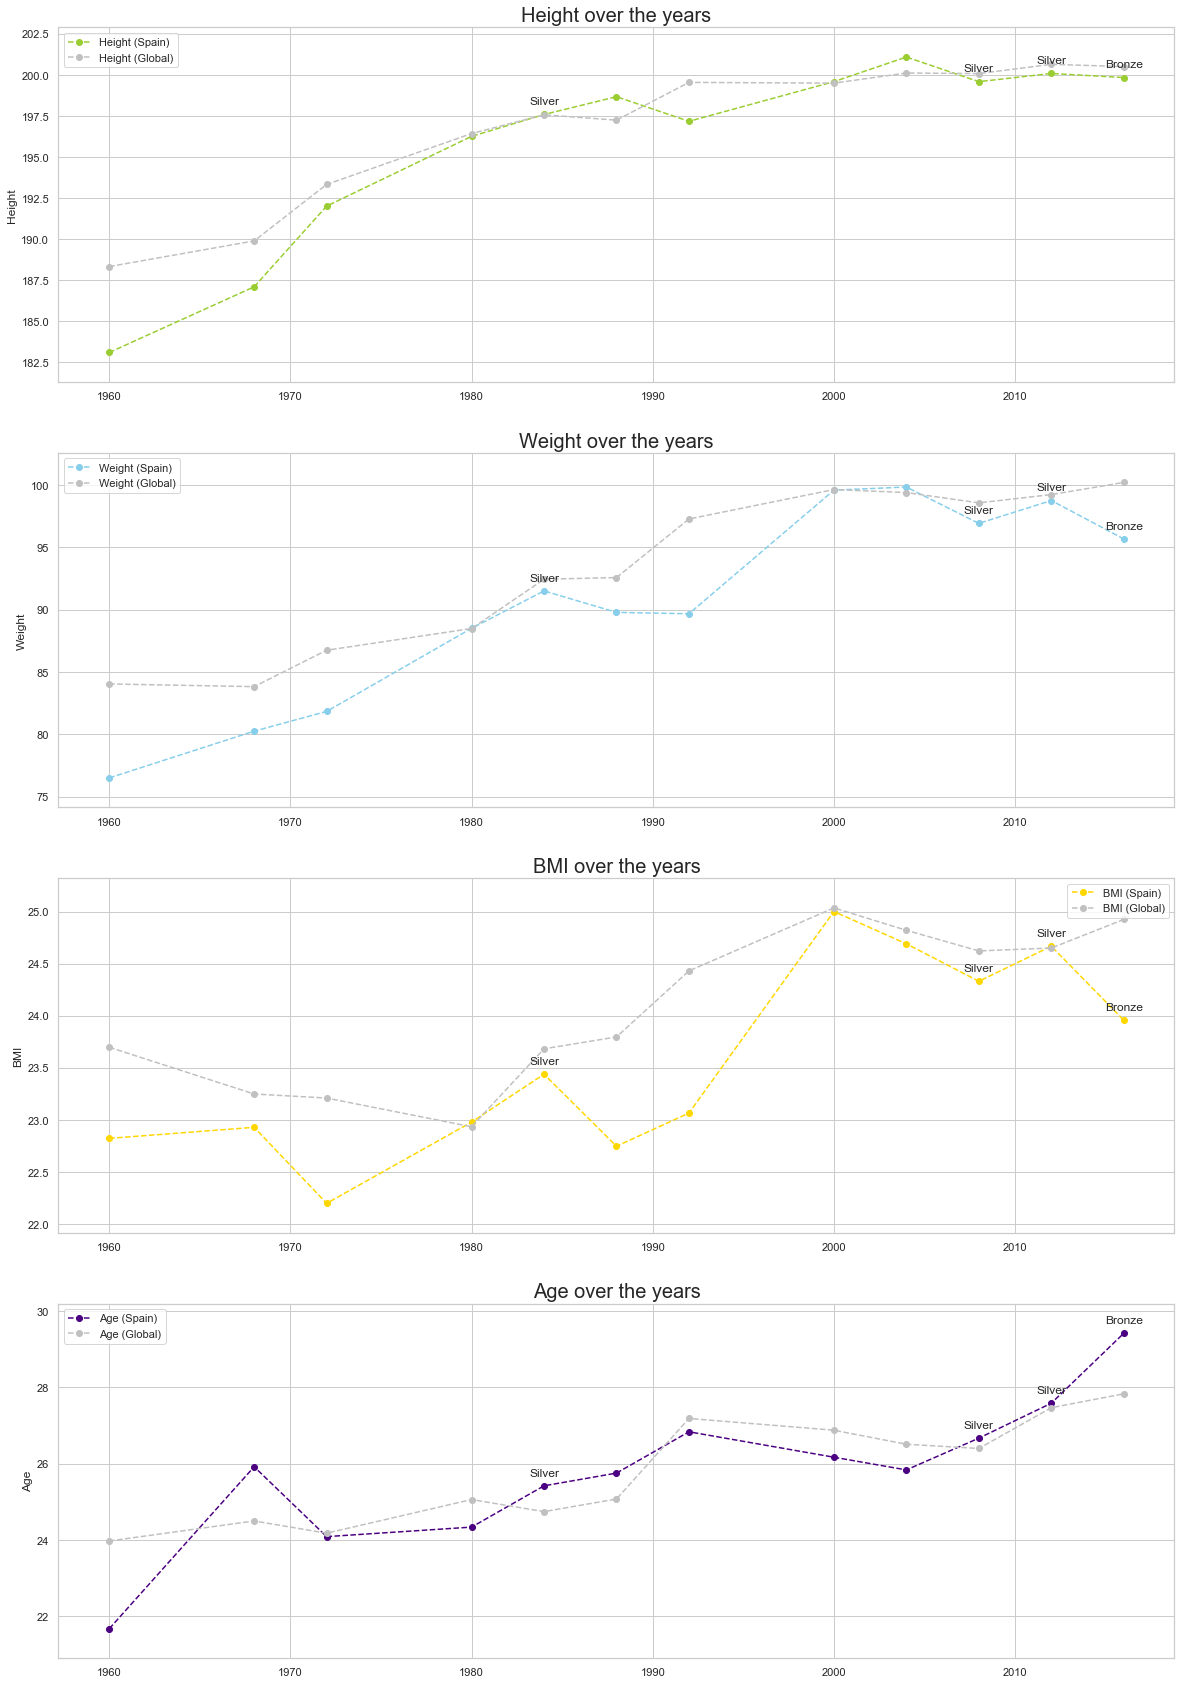

In [36]:
f = plt.figure(figsize=(20,30))
plt.tight_layout()

#grafico para la altura
ax =f.add_subplot(4, 1, 1)
ax.margins(0.05,0.1) 
ax.plot(statistics_df.Year, statistics_df.Height,color='yellowgreen',linestyle='dashed', marker='o', label='Height (Spain)')
for x,y,z in zip(statistics_df.Year,statistics_df.Height, statistics_df.Medal):
    label = z
    if (label != 0):
        ax.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center') 
ax.plot(global_statics_basket.Year, global_statics_basket.Height,color='silver',linestyle='dashed', marker='o',  label='Height (Global)')
ax.legend()
ax.set_title('Height over the years', fontsize=20)
ax.set_ylabel('Height')

#grafico para el peso
ax2 =f.add_subplot(4, 1, 2)
ax2.margins(0.05,0.1) 
ax2.plot(statistics_df.Year, statistics_df.Weight, color='skyblue',linestyle='dashed', marker='o' ,  label='Weight (Spain)')
for x,y,z in zip(statistics_df.Year,statistics_df.Weight, statistics_df.Medal):
    label = z
    if (label != 0):
        ax2.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center') 
ax2.plot(global_statics_basket.Year, global_statics_basket.Weight,color='silver',linestyle='dashed', marker='o',  label='Weight (Global)')
ax2.legend()
ax2.set_title('Weight over the years', fontsize=20)
ax2.set_ylabel('Weight')

#grafico para el BMI
ax3 =f.add_subplot(4, 1, 3)
ax3.margins(0.05,0.1) 
ax3.plot(statistics_df.Year, statistics_df.BMI,color='gold',linestyle='dashed', marker='o',  label='BMI (Spain)')
for x,y,z in zip(statistics_df.Year,statistics_df.BMI, statistics_df.Medal):
    label = z
    if (label != 0):
        ax3.annotate(label,
                     (x,y), 
                     textcoords="offset points",
                     xytext=(0,10), 
                     ha='center') 
ax3.plot(global_statics_basket.Year, global_statics_basket.BMI,color='silver',linestyle='dashed', marker='o',  label='BMI (Global)')
ax3.legend()
ax3.set_title('BMI over the years', fontsize=20)
ax3.set_ylabel('BMI')

#gráfico para la edad
ax4 =f.add_subplot(4, 1, 4)
ax4.margins(0.05,0.1) 
ax4.plot(statistics_df.Year, statistics_df.Age,color='indigo',linestyle='dashed', marker='o',  label='Age (Spain)')
for x,y,z in zip(statistics_df.Year,statistics_df.Age, statistics_df.Medal):
    label = z
    if (label != 0):
        ax4.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10), 
                     ha='center')
        
ax4.plot(global_statics_basket.Year, global_statics_basket.Age,color='silver',linestyle='dashed', marker='o',  label='Age (Global)')
ax4.legend()
ax4.set_title('Age over the years', fontsize=20)
ax4.set_ylabel('Age')

f.show()


De los gráficos anteriores obtenemos la siguieten informacion:
   - **Altura**: desde los 80, la aultra media de nuestro jugadores ha estado bastante a la par que la de altura media global.
   - **Peso**: el peso de los jugadores españoles tiende a ser algo menor que la media global. De hecho, los años con medalla, el peso medio del equipo español era menos al peso medio.
   - **BMI**: el indice de masa por corporal, por lo general, ha sido ligeramente inferior al global. Podemos deducir que los jugadroes españoles son de media igual de altos que elr esto de jugadores, pero algo más delgado. Aqui tenemos algo de disparidadad respecto a los años con medalla. Cuando se obtuvieron platas, el BMI era bastante cercano al grlobal. Sin embargo, en 2016, cuando se obtuvo el bronce, este era bastante inferior.
   - **Edad**: el aspecto más reseñable del gráfico de la edad es ver como en las última 3 ediciones de los Juegos Olímpicos se ha obtenido medalla y la media de la edad ha ido avanzando. Esto nos indica que los jugadores han sido más o menos los mismos y que han ido envejeciendo, pero se les ha mantenido porque han dado buenos resutlados.

### Deportes con mas medallas
Para este analisis, es necesario tener en cuenta que cuando un deporte de equipo gana una medalla, se le entrega una medalla a cada uno de sus participantes. Esto implica que en nuestros dataset vaya a aparecer un registro por cada uno de los jugadores de un equipo que ganó un oro. Para que los datos sean representativos, vamos a guardar un solo registro por evento y medalla.
<a id="sport_medals"></a>


In [37]:
spanish_sport_medals = spanish_athletes[['Year', 'Sport', 'Event', 'Medal']]
spanish_sport_medals.drop_duplicates(inplace=True)

In [38]:
#una vez que hemos eliminado los duplicados, podemos prescindir de la columna Event
spanish_sport_medals.drop('Event', axis=1, inplace=True)

In [39]:
#obtenemos la lista de deportes en lo que ha participado España
sports  = pd.unique(spanish_sport_medals.Sport)
#creamos un dataframe con las columnas 'Gold', 'Silver', 'Bronze' y 'Total' (que contendrá el total de medallas ganadas por cada deporte)
df_medals =  pd.DataFrame([], columns={'Sport', 'Gold', 'Silver', 'Bronze'})
for sport in sports:
    a = spanish_sport_medals[(spanish_sport_medals.Sport == sport)].set_index(["Sport", "Medal"]).count(level="Medal").transpose()
    a['Sport'] = sport
    df_medals = pd.concat([df_medals,a], ignore_index =True)
    
df_medals.fillna(0, inplace=True) 
df_medals.drop(0, axis=1, inplace=True)

#sumamos las medallas obtenidas en cada deporte y creamos una nueva columna con el total
df_medals['Total'] = df_medals.Gold + df_medals.Silver + df_medals.Bronze

df_medals.sort_values('Total', ascending=False, inplace =True)

In [40]:
df_medals.head(10)

,Bronze,Gold,Silver,Sport,Total
5,1,13,5,Sailing,19
17,4,5,7,Canoeing,16
10,5,5,5,Cycling,15
1,6,3,5,Athletics,14
18,3,2,7,Tennis,12
16,4,2,2,Swimming,8
13,2,3,1,Judo,6
28,1,1,4,Taekwondo,6
3,1,0,4,Basketball,5
11,1,1,3,Hockey,5


Para representar los datos obtenidos, vamos a prescindir de aquellos deportes en los que no se haya obtenido ninguna medalla con el fin de realizar un gráfico más claro. Se va a mostrar un gráfico de barras que contedrá el numero de medallas de bronce, plata y oro ganadas en cada deporte.

In [41]:
#obtenemos solo aquellos deportes en los que se ha obtenido al menos una medalla
df = df_medals[df_medals["Total"]> 0]

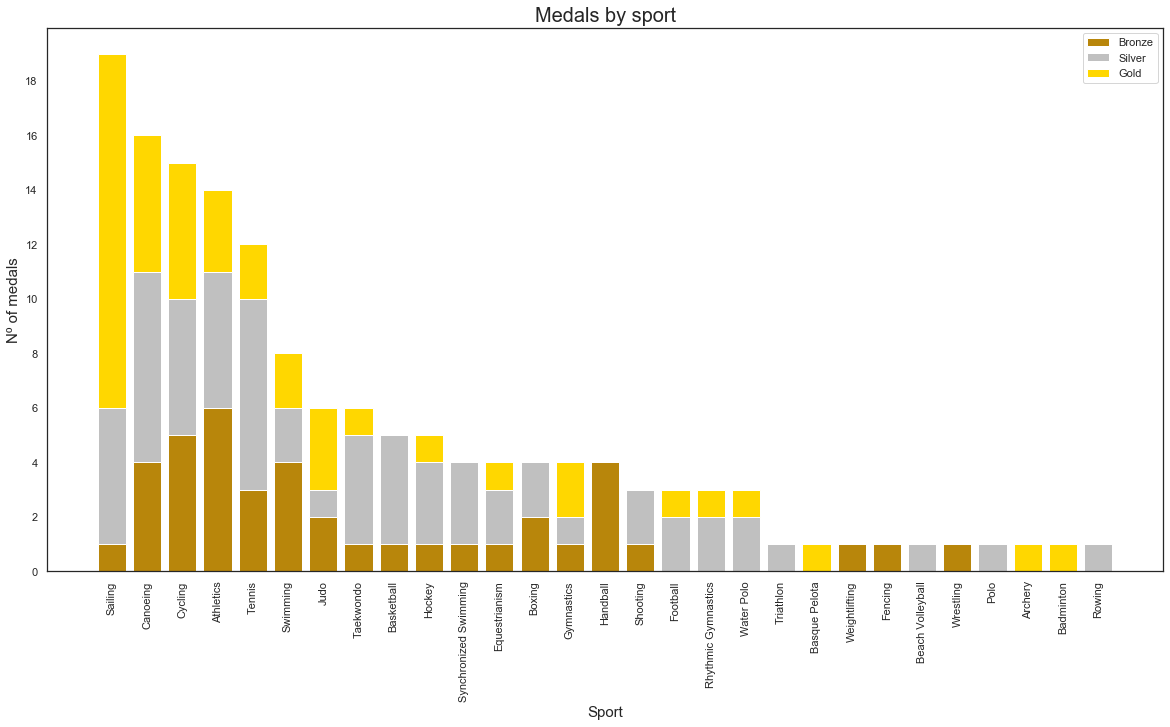

In [42]:
width =0.8

labels_y = range(0, max(df.Total),2)
sns.set(style="white")

plt.figure(figsize=(20,10))
p1 = plt.bar(df.Sport, df.Bronze, width,  color = "darkgoldenrod")
p2 = plt.bar(df.Sport, df.Silver, width, bottom=df.Bronze, color = "silver")
p3 = plt.bar(df.Sport, df.Gold,  width,bottom= np.array(df.Bronze)+np.array(df.Silver), color= "gold")
plt.xticks(df.Sport, df.Sport, rotation='vertical')
plt.yticks(labels_y)
plt.legend((p1[0], p2[0], p3[0]), ('Bronze', 'Silver', 'Gold'))
plt.title('Medals by sport', fontsize=20)
plt.ylabel('Nº of medals', fontsize=15)
plt.xlabel('Sport', fontsize=15)
plt.show()

# Atletismo: Análisis de los resultados obtenidos a lo largo de los JJOO
<a id='ath'></a>
En este apartado vamos a analizar los atletas que han participado en los eventos de 100m y Maratón en Atletismo, así como los resultados obtenidos. Puesto que el dataset con el que trabajamos no contiene los resultados, se ha incluido un dataframe que contiene esos resultados. 

Este apartado va a constar de los siguiente subapartados:
 - **100m**: resultados obtenidos a lo largo de la historia en esta prueba
 - **Regrsión**: a partir de los resultados obtenidos en el subapartado anterior, se crea un modelo regresor para predecir los tiempos que se obtendrán los siguientes años.
 - **Maratón**: va a ser interesante comparar a los atletas que compiten en la categoría de maratón a los que compiten en los 100m
 - **Machine Learning**: se va a crear un modelo de Machine Learning que prediga el tiempo que va a realizar un atleta dado su peso, edad y altura.
 

Se va a utizar el dataset que incluye los tiempo realizados por cada atleta

In [43]:
athletics_df.head()

,Gender,Event,Location,Year,Medal,Name,NOC,Result,Wind
1,M,10000M Men,Rio,2016,Gold,Mohamed FARAH,USA,25:05.17,0.0
2,M,10000M Men,Rio,2016,Silver,Paul Kipngetich TANUI,KEN,27:05.64,0.0
3,M,10000M Men,Rio,2016,Bronze,Tamirat TOLA,ETH,27:06.26,0.0
4,M,10000M Men,Beijing,2008,Gold,Kenenisa BEKELE,ETH,27:01.17,0.0
5,M,10000M Men,Beijing,2008,Silver,Sileshi SIHINE,ETH,27:02.77,0.0


- Funciones de utilidad

In [44]:
def get_results_athletes(athletes, results_df ,event, event_df, type_column = 'float64'):
    '''
    Obtiene las marcas obtenidas por los atletas en un evento determinado
    
    @param athletes
        dataframe con los atletas y su información física
    @param results_df
        dataframe con los tiempos obtenidos en cada evento por cada deportista
    @param event
        nombre del evento del que se van a obtener los resultados en el dataframe athletes
    @param event_df
        nombre del evento del que se van a obtener los resultados en el dataframe results_df
    @param type_column
        tipo de datos de la columna Results 
        
    @return
        dataframe que contine la información de cada atleta de un evento determinado junto con su marca
    '''
    athletes_event = athletes[athletes.Event == event]
    athletes_event_results = results_df[results_df.Event == event_df][['NOC', 'Year', 'Medal', 'Result']]
    athletes_event_results.Result = athletes_event_results.Result.astype(type_column) 
    results_event = pd.merge(athletes_event, athletes_event_results, on=['Year','Medal','NOC'])
    
    return results_event.sort_values('Year')
    

### 100m
<a id="100m"></a>
Una de las pruebas más conocidas del Atletismo son los 100m lisos. Aquí, vamos a analizar los tiempos que han obtenido los ganadores de la medalla de oro a lo largo de la historia, así como sus condiciones físicas, en especial, se quiere ver la relación entre el peso/altura con el tiempo obtenido. Este análisis se va a hacer tanto de atletetas masculinos como femeninos.

In [45]:
athletes = athlete_event[(athlete_event.Sport == 'Athletics') ]

In [46]:
results_100m_men = get_results_athletes(athletes, athletics_df,"Athletics Men's 100 metres", "100M Men" )
results_100m_women = get_results_athletes(athletes, athletics_df,"Athletics Women's 100 metres", "100M Women" )

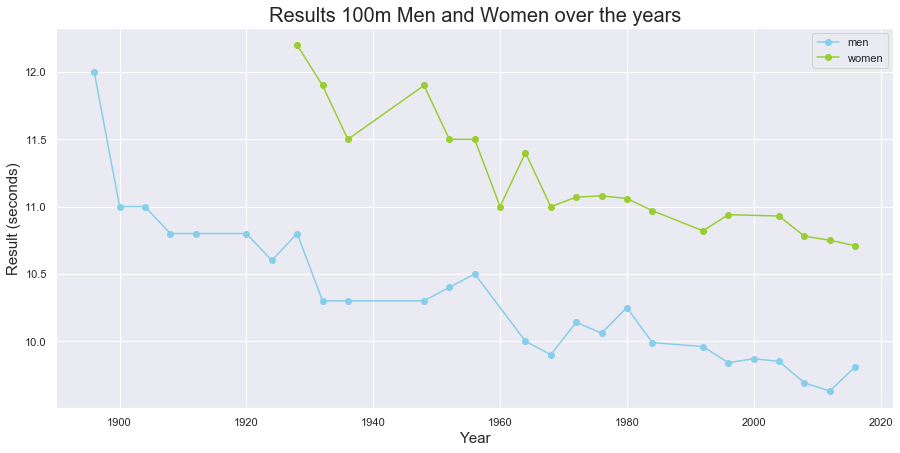

In [47]:
sns.set()
result_gold_men = results_100m_men[results_100m_men.Medal == 'Gold']
result_gold_women = results_100m_women[results_100m_women.Medal == 'Gold']

plt.figure(figsize= (15, 7))
men_plot, = plt.plot(result_gold_men.Year, result_gold_men.Result,label='men',  marker= 'o', color='skyblue')
women_plot, = plt.plot(result_gold_women.Year, result_gold_women.Result,label='women', marker= 'o', color='yellowgreen')

plt.legend(handles=[men_plot, women_plot])
plt.title('Results 100m Men and Women over the years', fontsize=20)
plt.xlabel('Year',  fontsize=15)
plt.ylabel('Result (seconds)', fontsize=15)
plt.show()

Mediante la libreria **plotly**, vamos a representar un gráfico en 3D que nos ayudará a entender la relacion entre los distintos datos obtenidos.

In [52]:
import plotly.express as px

fig = px.scatter_3d(result_gold_men, x='Weight', y='Height', z='Result', color='Result', size_max=18,opacity=0.7, title="Men")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), title='Men')
fig.show()


Es facil comprobar que los 3 mejores tiempos están colocados sobre la x y la y, lo que significa que los atletas que lo consiguieron tienen la misma altura y peso. Esto nos puede hacer deducir que se trata de la misma persona.Para comprobarlo, vamos a ordenar el dataframe de los atletas que han obtenido el oro por orden ascendente de tiempo necesitado para finalizar la prueba y seleccionar los 3 primeros.

In [53]:
result_gold_men.sort_values("Result").head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,Result
8,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012,London,Athletics,Athletics Men's 100 metres,Gold,9.63
7,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008,Beijing,Athletics,Athletics Men's 100 metres,Gold,9.69
9,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold,9.81


Efectivamente, comprobamos que el ganador de los 3 eventos fue Ussain Bolt, en los años 2008, 2012 y 2016.

A continuación, vamos a representar el mismo gráfico con las atletas mujeres

In [54]:
fig = px.scatter_3d(result_gold_women, x='Weight', y='Height', z='Result', color='Result', size_max=18,opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Marathon
<a id="mth"></a>
Un aspecto interesante a analizar dentro del atletismo es conocer las diferencias fisiológicas entre deportistas de diferntes pruebas. En especial, queremos ver como varía la altura, peso y edad de los deportistas que participan en las pruebas de 100m y Marathon. Por lo tanto, vamos a obtener los deportistas que participaron en los últimos juegos olímpicos en estas dos disciplinas y vamos a compararlos.

In [55]:
ath_mth_2016 = athlete_event[(athlete_event.Sport == 'Athletics') & (athlete_event.Event == "Athletics Men's Marathon") & (athlete_event.Year == 2016)]
ath_100m_2016 = athlete_event[(athlete_event.Sport == 'Athletics') & (athlete_event.Event == "Athletics Men's 100 metres") & (athlete_event.Year == 2016)]

In [56]:
def get_comparative_df(df1, df2, metric, df1_name, df2_name):
    '''
    Funcion que genera un dataset que compara el valor de una determinada métrica en dos datasets
    
    @param df1
        primer dataset a comparar
    @param df2
        segundo dataset a comparar    
    @param metric
        metrica que se quiere comparar
    @param df1_name
        nombre para la columna del primer dataframe
    @param df2_name
        nombre para la columna del segundo dataframe    
    
    @return
        dataframe con dos columnas, una para la metrica y otra para el dataframe al que pertenece dicha metrica
    '''
    df = pd.DataFrame([], columns={metric, 'Event'})
    df = df.append(pd.DataFrame({metric:[df1.iloc[i][metric] for i in range(df1.shape[0])],  'Event':df1_name}))
    df = df.append(pd.DataFrame({metric:[df2.iloc[i][metric] for i in range(df2.shape[0])],  'Event':df2_name}))
    return df

weight = get_comparative_df(ath_100m_2016, ath_mth_2016, 'Weight', '100m', 'Marathon')
height = get_comparative_df(ath_100m_2016, ath_mth_2016, 'Height', '100m', 'Marathon')
age = get_comparative_df(ath_100m_2016, ath_mth_2016, 'Age', '100m', 'Marathon')

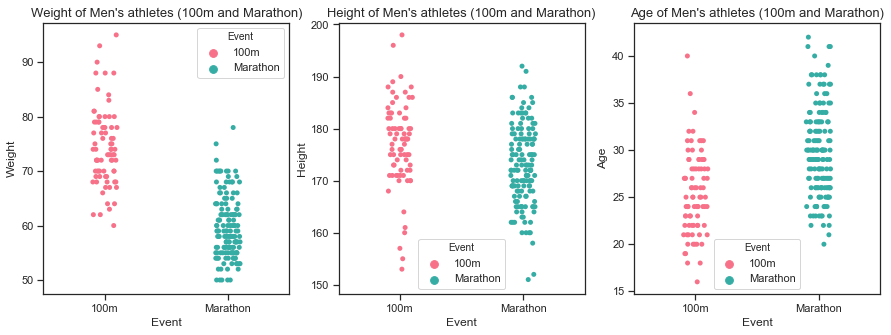

In [57]:
sns.set(style="ticks")
f = plt.figure(figsize=(15,5))
plt.tight_layout()
pts = 13
ax =f.add_subplot(1, 3, 1)
g =sns.catplot(y="Weight", x="Event", data=weight, hue="Event", palette="husl",ax=ax)
ax.set_title("Weight of Men's athletes (100m and Marathon)", fontsize=pts)
plt.close(g.fig)
ax2 =f.add_subplot(1, 3, 2)
g = sns.catplot(y="Height", x="Event", data=height, hue="Event", palette="husl", ax= ax2)
ax2.set_title("Height of Men's athletes (100m and Marathon)", fontsize=pts)
plt.close(g.fig)

ax3 =f.add_subplot(1, 3, 3)
g = sns.catplot(y="Age", x="Event", data=age, hue="Event", palette="husl", ax=ax3)
ax3.set_title("Age of Men's athletes (100m and Marathon)", fontsize=pts)
plt.close(g.fig)
plt.show()

In [58]:
print("PESO MEDIO")
print("\t-100m:", round(ath_100m_2016.Weight.mean(),3), "\n\t\tDesviacion tipica:", round(ath_100m_2016.Weight.std(),3))
print("\t-Marathon:", round(ath_mth_2016.Weight.mean(),3),"\n\t\tDesviacion tipica:", round(ath_mth_2016.Weight.std(),3))
print("")
print("ALTURA MEDIA")
print("\t-100m:", round(ath_100m_2016.Height.mean(),3), "\n\t\tDesviacion tipica:", round(ath_100m_2016.Height.std(),3))
print("\t-Marathon:", round(ath_mth_2016.Height.mean(),3), "\n\t\tDesviacion tipica:", round(ath_mth_2016.Height.std(),3))
print("")
print("EDAD MEDIA")
print("\t-100m:", round(ath_100m_2016.Age.mean(),3),"\n\t\tDesviacion tipica:",  round(ath_100m_2016.Age.std(),3))
print("\t-Marathon:", round(ath_mth_2016.Age.mean(),3),"\n\t\tDesviacion tipica:",  round(ath_mth_2016.Age.std(),3))

PESO MEDIO
	-100m: 74.423 
		Desviacion tipica: 7.098
	-Marathon: 59.721 
		Desviacion tipica: 5.621

ALTURA MEDIA
	-100m: 177.064 
		Desviacion tipica: 8.168
	-Marathon: 173.007 
		Desviacion tipica: 7.565

EDAD MEDIA
	-100m: 25.417 
		Desviacion tipica: 4.302
	-Marathon: 29.858 
		Desviacion tipica: 4.752


A partir de las medias obtenidas y de los gráficos representados podemos obtener las siguientes conclusiones:
   - Los atletas que participan en Maratón tienden a ser más ligeros que aquellos que participan en los 100m. Es el aspecto físico en el que más se diferencian los atletas de ambas disciplinas.
   - La altura media de los deportistas es bastante similar, aunque en maratón hay más atletas de baja estatura que en 100m. En 100m, hay muy pocos atleras por debajo de 1.70, sin embargo en maratón, hay bastantes que se encuentran ente 1.60 y 1.70
   - Mientras ques es poco común que haya deportistas de 100m por encima de los 30 años, los corredores de maratón pueden seguir compitiendo hasta los 40 años

### Regresion
<a id="reg2"></a>
Hemos visto en la gráfica anterior que los tiempos han ido mejorando a lo largo de los años, creando una curva similar a una regresion logarítmica. Por lo tanto, si obtenemos los valores de esa curva, podemos tratar de predecir los tiempos que se obtendrán en años futuros. Para ello, se ha utilizado la funcion **curve_fit** de la librería **Scipy**, la cual ajusta los parámetros de la funcion.

In [59]:
from scipy.optimize import curve_fit
class Model:  
    '''
    Modelo que predice los tiempos que se obtendrán en años futuros
    '''        
    def fit(self,years, result):
        '''
        Función que obtiene los valores que definen la curva . Ademas, establece los dataframes pasados como X(años) e Y(resultados) 
        
        @param years
            Años para los que hay datos
        @param result
            Marcas de tiempo obtenidas para esos años
        '''
        values, _ = curve_fit(lambda t,a,b: a+b*np.log(t),  years,  result)
        self.a = values[0]
        self.b = values[1]
        self.x = years
        self.y = result
    
    def predict(self, year):
        '''
        Función que predice el tiempo que se va a obtener con un año dado
        
        @param year
            Año que se quiere predecir
            
        @return
            Tiempo que, según la curva calculada, se obtendrá
        '''
        return self.a+np.log(year) * self.b
    
    def error(self):
        '''
        Función que calcula el error cometido al aproximar a una curva los datos obtenidos
        
        @return 
            Error cometido al aproximar los valores a la curva
        '''
        prediction = [self.predict(year) for year in self.x]
        error = np.mean([abs(prediction[i] -self.y[i]) for i in range(len(prediction))])
        return error
    
    def plot(self):
        x = range(1896, 2020,1)
        y = self.predict(x)
        plt.figure(figsize=(15,5))
        plt.plot(x,y, label= 'Approximation')
        plt.plot(self.x, self.y, label='Real')
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('Results (s)')
        plt.show()
    

El modelo ha sido entrenado con un error = 0.19729814893659256
Se preve que el año 2020 los resutlados serán 9.565395094941351


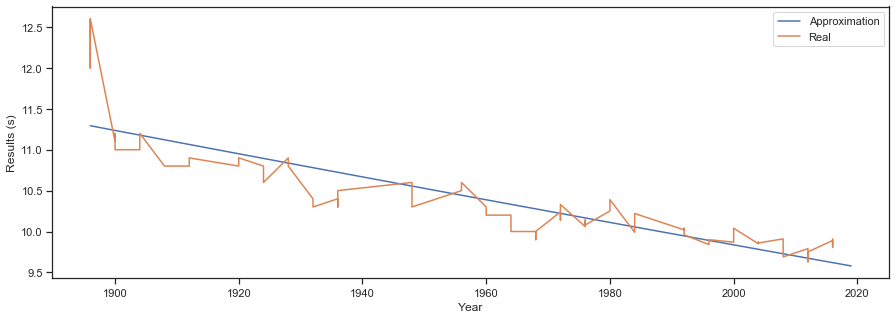

In [60]:
m =  Model()
m.fit(results_100m_men.Year.values, results_100m_men.Result.values)
print('El modelo ha sido entrenado con un error =',m.error())
print('Se preve que el año 2020 los resutlados serán', m.predict(2020))
m.plot()

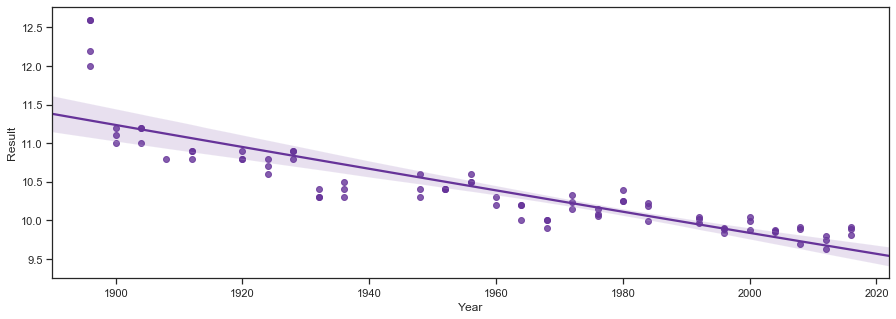

In [61]:
#Representamos la relación entre el año y los resultados obtenidos
plt.figure(figsize=(15,5))
ax = sns.regplot(x="Year", y="Result", data=results_100m_men, logx =True, color='rebeccapurple')
plt.show()

Como podemos comprobar, la relación obtenida por el modelo implementado y la obtenida por la funcion *regplot* son muy similares.

### Machine Learning
<a id="ml"></a>
Queremos crear tambien un modelo de Machine Learning que sea capaz de predecir el tiempo que va a hacer un atleta en función de su **edad**, su **sexo**, su **peso**, y su **altura** en una prueba determinada. En este caso, vamos a crear un modelo que prediga los resultados para los 100m lisos. Para ello, se han utilzado dos métodos diferentes, para así tratar de encontrar aquel que da mejores resultados: ***Regresion Lineal*** y ***Perceptrón Multicapa***. Se ha utilizado la librería **scikit-learn** para la implementación de ambos métodos.


In [62]:
#imports necesarios para la implementacion de los modelos
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [63]:
#unimos en un mismo dataset los atletas hombres y mujeres y transformamos los valores del genero a entero (0: Hombres, 1:Mujeres)
data_men = results_100m_men.dropna() 
data_women = results_100m_women.dropna()
data = pd.concat([data_men, data_women])
data['Sex'] = data['Sex'].apply(lambda x: 0 if x== 'M' else 1)

In [64]:
#obtenemos las columnas que queremos utilizar para el entrenamiento del modelo
X = data[['Weight', 'Height', 'Age', 'Sex']]
y = data[['Result']]

In [65]:
#dividimos entre conjunto de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
#creamos el modelo por regresion lineal
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('[Linear Regression] Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[Linear Regression] Root Mean Squared Error: 0.4467310361500499


In [67]:
#creamos el modelo por perceptrón multicapa
error=10
while error>1:
    mlp = MLPRegressor(hidden_layer_sizes=(5,),
                                           activation='relu',
                                           solver='adam',
                                           learning_rate='adaptive',
                                           max_iter=2000,
                                           learning_rate_init=0.01,
                                           alpha=0.01)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    error =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('[Multilayer Perceptron] Root Mean Squared Error:',error)

[Multilayer Perceptron] Root Mean Squared Error: 0.5988687704395702


In [68]:
def make_prediction(model,  weight, height, age, sex):
    '''
    Función que predice el tiempo que hara un atleta dado un modelo previamente entrenado y las caracteristicas de ese atleta
    
    @param model
        Modelo entrenado
    @param weight
        Peso del atleta
    @param height
        Altura del atleta
    @param age
        Edad del atleta
    @param sex
        Sexo del atleta
        
    @return
        predicted time (seconds)
    '''
    return model.predict([[weight, height, age, sex]])

In [69]:
print("Introduce la edad")
age = int(input())
print("Introduce el sexo (0: Hombre, 1:Mujer)")
sex = int(input())
print("Introduce el peso (kg)")
weight = float(input())
print("Introduce la altura (cm)")
height = float(input())
print("Introduce el modelo (0: Regresion Lineal 1:Perceptrón Multicapa)")
m = int(input())

if m == 0:
    value = make_prediction(regressor,  weight, height, age, sex)
elif m == 1:
    value = make_prediction(mlp,  weight, height, age, sex)

print("Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo: ", value)

Introduce la edad
25
Introduce el sexo (0: Hombre, 1:Mujer)
0
Introduce el peso (kg)
94
Introduce la altura (cm)
190
Introduce el modelo (0: Regresion Lineal 1:Perceptrón Multicapa)
0
Segun el modelo escogido, el atleta con los datos introducidos hará el siguiente tiempo:  [[9.88425744]]
